<a href="https://colab.research.google.com/github/natdebandi/migmobs2/blob/main/dataset_construction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

## Dataset construction V2.1

**Natalia Dedandi**


'ARG', 'CHL', 'BOL', 'VEN'


**I1.1	Mouvements to country**


https://migrationpolicycentre.eu/global-mobilities/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GT_Mobility_v1.0.csv'

df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
   source_name  target_name source_iso3 target_iso3  year  estimated_trips  \
0  Afghanistan       Rwanda         AFG         RWA  2014             29.0   
1  Afghanistan  Netherlands         AFG         NLD  2014           6991.0   
2  Afghanistan        Congo         AFG         COG  2011              0.0   
3  Afghanistan      Hungary         AFG         HUN  2012            308.0   
4  Afghanistan   Cabo Verde         AFG         CPV  2012              0.0   

       dist source_region target_region source_subregion    target_subregion  
0  5755.222          Asia        Africa    Southern Asia  Sub-Saharan Africa  
1  5361.400          Asia        Europe    Southern Asia      Western Europe  
2  7100.583          Asia        Africa    Southern Asia  Sub-Saharan Africa  
3  4367.694          Asia        Europe    Southern Asia      Eastern Europe  
4  9324.580          Asia        Africa    Southern Asia  Sub-Saharan Africa  


**Number of movements from any country to Country of Analysis (ARG, CHIL)**

In [ ]:
# Filter of countries of interest
countries = ['ARG', 'CHL', 'BOL', 'VEN']
#countries = ['ARG', 'CHL']
latam_df = df[(df['target_iso3'].isin(countries))]
print(latam_df.head())

     source_name                         target_name source_iso3 target_iso3  \
54   Afghanistan    Bolivia (Plurinational State of)         AFG         BOL   
82   Afghanistan  Venezuela (Bolivarian Republic of)         AFG         VEN   
158  Afghanistan    Bolivia (Plurinational State of)         AFG         BOL   
220  Afghanistan                           Argentina         AFG         ARG   
232  Afghanistan                               Chile         AFG         CHL   

     year  estimated_trips      dist source_region target_region  \
54   2011              3.0  15349.95          Asia      Americas   
82   2013              0.0  13208.57          Asia      Americas   
158  2014              3.0  15349.95          Asia      Americas   
220  2012             19.0  15298.50          Asia      Americas   
232  2014             14.0  16353.90          Asia      Americas   

    source_subregion                 target_subregion  
54     Southern Asia  Latin America and the Caribbean 

In [ ]:
#contruyo un indicador por pais de destino y otro de origen sumando los estimated_by_hundred
latam_df_target = latam_df.groupby(['year','target_iso3',])['estimated_trips'].sum().reset_index()
latam_df_target

,year,target_iso3,estimated_trips
0,2011,ARG,12133921.0
1,2011,BOL,1493371.0
2,2011,CHL,5916559.0
3,2011,VEN,2849358.0
4,2012,ARG,12678938.0
5,2012,BOL,1697027.0
6,2012,CHL,6528705.0
7,2012,VEN,3469671.0
8,2013,ARG,12500972.0
9,2013,BOL,1797211.0


In [ ]:
db_indicators = latam_df_target[['target_iso3', 'year','estimated_trips']]
db_indicators = db_indicators.rename(columns={
    'target_iso3': 'country_code',
    'year': 'year',
    'estimated_trips': 'value'
})
print(db_indicators.head())

  country_code  year       value
0          ARG  2011  12133921.0
1          BOL  2011   1493371.0
2          CHL  2011   5916559.0
3          VEN  2011   2849358.0
4          ARG  2012  12678938.0


In [ ]:
db_indicators['indicator'] = 'target_mobility'
db_indicators['fuente'] = 'GT_Mobility_v1.0'

In [ ]:
db_indicators.head()

,country_code,year,value,indicator,fuente
0,ARG,2011,12133921.0,target_mobility,GT_Mobility_v1.0
1,BOL,2011,1493371.0,target_mobility,GT_Mobility_v1.0
2,CHL,2011,5916559.0,target_mobility,GT_Mobility_v1.0
3,VEN,2011,2849358.0,target_mobility,GT_Mobility_v1.0
4,ARG,2012,12678938.0,target_mobility,GT_Mobility_v1.0


In [ ]:
# Pivot the table to have 'source_mobility' and 'target_mobility' as columns
pivot_df = db_indicators.pivot_table(index=['indicator', 'year'], columns='country_code', values='value').reset_index()
pivot_df

country_code,indicator,year,ARG,BOL,CHL,VEN
0,target_mobility,2011,12133921.0,1493371.0,5916559.0,2849358.0
1,target_mobility,2012,12678938.0,1697027.0,6528705.0,3469671.0
2,target_mobility,2013,12500972.0,1797211.0,6644472.0,3823580.0
3,target_mobility,2014,13044692.0,1991253.0,7172922.0,3408417.0
4,target_mobility,2015,15021604.0,2095841.0,8405899.0,3152904.0
5,target_mobility,2016,16989971.0,2268038.0,9791534.0,3108475.0


In [ ]:
df_plot=db_indicators[(db_indicators['indicator']=='target_mobility')]
title_plot="I1.1 target mobility  -  GT_Mobility_v1.0"

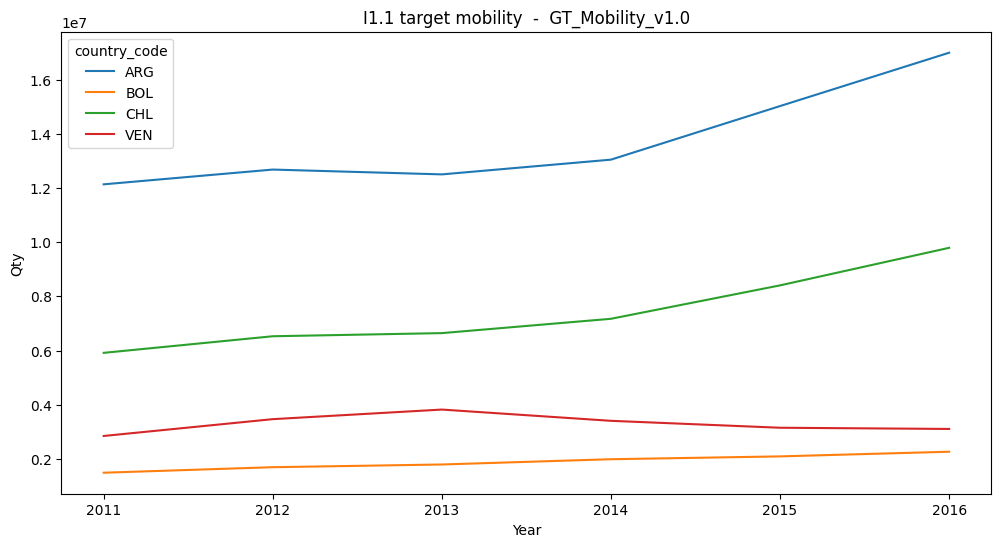

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_plot)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()


**I1.2	Mouvements from 'CHL', 'BOL', 'VEN' to ARG**

In [ ]:
latam_df = df[(df['source_iso3'].isin(countries)) & (df['target_iso3'] == "ARG")]


In [ ]:
db_temp = latam_df[['source_iso3', 'year','estimated_trips']]
db_temp = db_temp.rename(columns={
    'source_iso3': 'country_code',
    'year': 'year',
    'estimated_trips': 'value'
})
print(db_temp.head())

      country_code  year     value
24578          BOL  2014  576578.0
24669          BOL  2012  406932.0
24694          BOL  2016  668119.0
24705          BOL  2013  465051.0
24821          BOL  2015  613185.0


In [ ]:
db_temp['indicator'] = 'source_mobility_ARG'
db_temp['fuente'] = 'GT_Mobility_v1.0'

In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

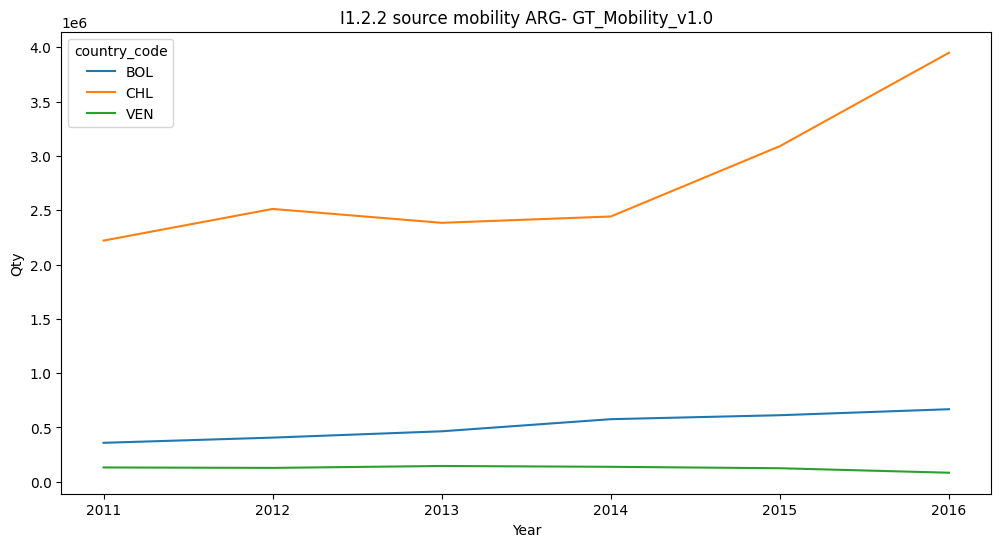

In [ ]:
df_plot=db_indicators[(db_indicators['indicator']=='source_mobility_ARG')]
title_plot="I1.2.2 source mobility ARG- GT_Mobility_v1.0"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_plot)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

**I1.3	Mouvements to CHL**

*Number of movements from 'ARG', 'BOL', 'VEN' to CHL*

In [ ]:
latam_df = df[(df['source_iso3'].isin(countries)) & (df['target_iso3']=='CHL')]


In [ ]:
db_temp = latam_df[['source_iso3', 'year','estimated_trips']]
db_temp = db_temp.rename(columns={
    'source_iso3': 'country_code',
    'year': 'year',
    'estimated_trips': 'value'
})
db_temp['indicator'] = 'source_mobility_CHL'
db_temp['fuente'] = 'GT_Mobility_v1.0'

In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

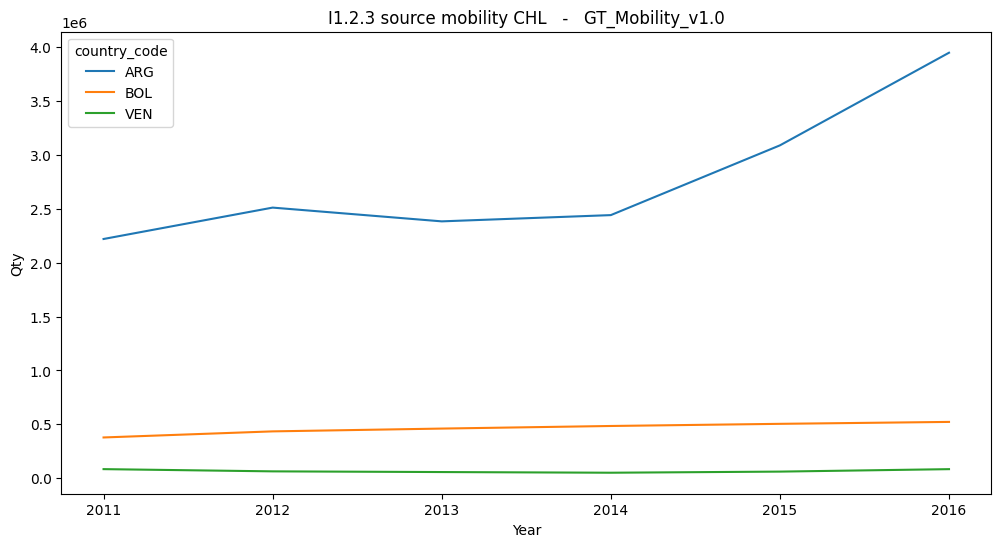

In [ ]:
df_plot=db_indicators[(db_indicators['indicator']=='source_mobility_CHL')]
title_plot="I1.2.3 source mobility CHL   -   GT_Mobility_v1.0"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_plot)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()


**(2) Annual migration flow estimates: inmigration and emigration**

from:
https://riks.cris.unu.edu/annual-bilateral-migration-data


2.1 inmigration_stock

In [ ]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/migration_imputed_RIKS_dec2021.csv'

df2 = pd.read_csv(file_path)
print(df2.head())

  iso_or               origin iso_des destination  year  stock  flow  inflow  \
0    AAB  Antigua and Barbuda     ABW       Aruba  1960     16   NaN     NaN   
1    AAB  Antigua and Barbuda     ABW       Aruba  1961     16   0.0     NaN   
2    AAB  Antigua and Barbuda     ABW       Aruba  1962     15  -1.0     NaN   
3    AAB  Antigua and Barbuda     ABW       Aruba  1963     15   0.0     NaN   
4    AAB  Antigua and Barbuda     ABW       Aruba  1964     15   0.0     NaN   

   outflow  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [ ]:
latam_mig_df = df2[(df2['iso_des'].isin(countries))]
print(latam_mig_df.head())

    iso_or               origin iso_des destination  year  stock  flow  \
436    AAB  Antigua and Barbuda     ARG   Argentina  1960      0   0.0   
437    AAB  Antigua and Barbuda     ARG   Argentina  1961      0   0.0   
438    AAB  Antigua and Barbuda     ARG   Argentina  1962      0   0.0   
439    AAB  Antigua and Barbuda     ARG   Argentina  1963      0   0.0   
440    AAB  Antigua and Barbuda     ARG   Argentina  1964      0   0.0   

     inflow  outflow  
436     NaN      NaN  
437     NaN      NaN  
438     NaN      NaN  
439     NaN      NaN  
440     NaN      NaN  


In [ ]:
inmigration_df = latam_mig_df.groupby(['year', 'iso_des'])['stock'].sum().reset_index()
inmigration_df

,year,iso_des,stock
0,1960,ARG,2683416
1,1960,BOL,43730
2,1960,CHL,109563
3,1960,VEN,510822
4,1961,ARG,2630230
...,...,...,...
239,2019,VEN,1343206
240,2020,ARG,2245714
241,2020,BOL,160289
242,2020,CHL,1601702


In [ ]:
#Creo el indicador

db_temp = inmigration_df[['iso_des', 'year','stock']]
db_temp = db_temp.rename(columns={
    'iso_des': 'country_code',
    'year': 'year',
    'stock': 'value'
})
print(db_temp.head())

  country_code  year    value
0          ARG  1960  2683416
1          BOL  1960    43730
2          CHL  1960   109563
3          VEN  1960   510822
4          ARG  1961  2630230


In [ ]:
db_temp['indicator'] = 'inmigration_stock'
db_temp['fuente'] = 'UNU-CRIS'

In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

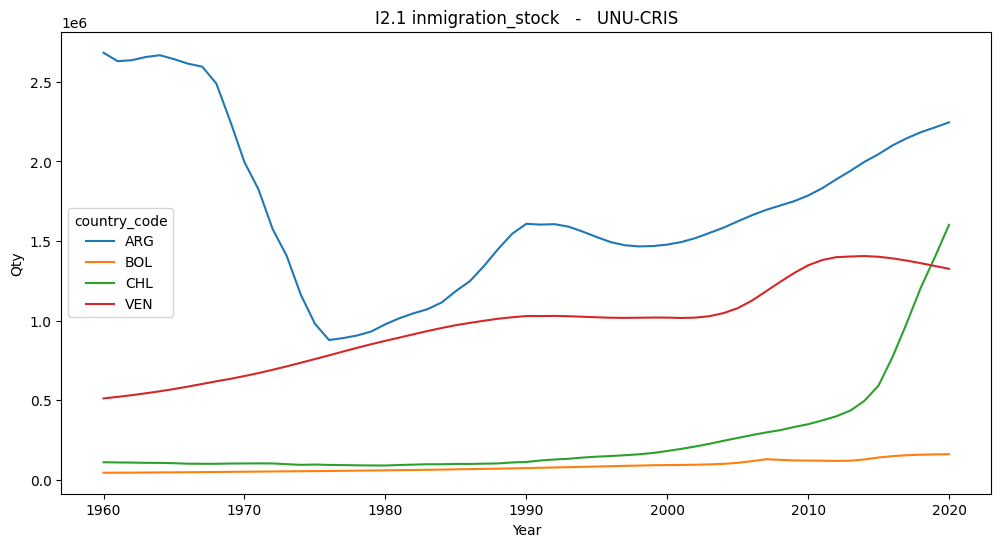

In [ ]:
df_plot=db_indicators[(db_indicators['indicator']=='inmigration_stock')]
title_plot="I2.1 inmigration_stock   -   UNU-CRIS"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_plot)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

Data correction from offical data from CENSUS

https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-74252016000300201



In [ ]:
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/data_correction_v1.csv'

df_correction = pd.read_csv(file_path)
print(df_correction.head())

  country_code    year      value          indicator          fuente
0          ARG  1960.0  2604447.0  inmigration_stock  INDEC - Census
1          ARG  1970.0  2210400.0  inmigration_stock  INDEC - Census
2          ARG  1980.0  1912217.0  inmigration_stock  INDEC - Census
3          ARG  1991.0  1628210.0  inmigration_stock  INDEC - Census
4          ARG  2001.0  1531940.0  inmigration_stock  INDEC - Census


In [ ]:
years_to_filter = [1960, 1970, 1980, 1991, 2001, 2010]
filtered_df = db_indicators[(db_indicators['indicator'] == 'inmigration_stock') & (db_indicators['year'].isin(years_to_filter))& (db_indicators['country_code']=='ARG')]

# Print the filtered DataFrame
filtered_df

,country_code,year,value,indicator,fuente
0,ARG,1960,2683416.0,inmigration_stock,UNU-CRIS
40,ARG,1970,1995770.0,inmigration_stock,UNU-CRIS
80,ARG,1980,976756.0,inmigration_stock,UNU-CRIS
124,ARG,1991,1603133.0,inmigration_stock,UNU-CRIS
164,ARG,2001,1493360.0,inmigration_stock,UNU-CRIS
200,ARG,2010,1785826.0,inmigration_stock,UNU-CRIS


the values are not exactly the same as the official census data

In [ ]:
# prompt: update db_indicators from df_correction where indicator=indicator, year=year and country-code=country_code

# Assuming df_correction has columns 'indicator', 'year', 'country_code', and the value to update
for index, row in df_correction.iterrows():
  db_indicators.loc[(db_indicators['indicator'] == row['indicator']) &
                    (db_indicators['year'] == row['year']) &
                    (db_indicators['country_code'] == row['country_code']),'value'] = row['value'] # Replace 'value' with the actual column name in df_correction that holds the updated values

In [ ]:
years_to_filter = [1960, 1970, 1980, 1991, 2001, 2010]
filtered_df = db_indicators[(db_indicators['indicator'] == 'inmigration_stock') & (db_indicators['year'].isin(years_to_filter))& (db_indicators['country_code']=='ARG')]

# Print the filtered DataFrame
filtered_df

,country_code,year,value,indicator,fuente
0,ARG,1960,2604447.0,inmigration_stock,UNU-CRIS
40,ARG,1970,2210400.0,inmigration_stock,UNU-CRIS
80,ARG,1980,1912217.0,inmigration_stock,UNU-CRIS
124,ARG,1991,1628210.0,inmigration_stock,UNU-CRIS
164,ARG,2001,1531940.0,inmigration_stock,UNU-CRIS
200,ARG,2010,1805957.0,inmigration_stock,UNU-CRIS


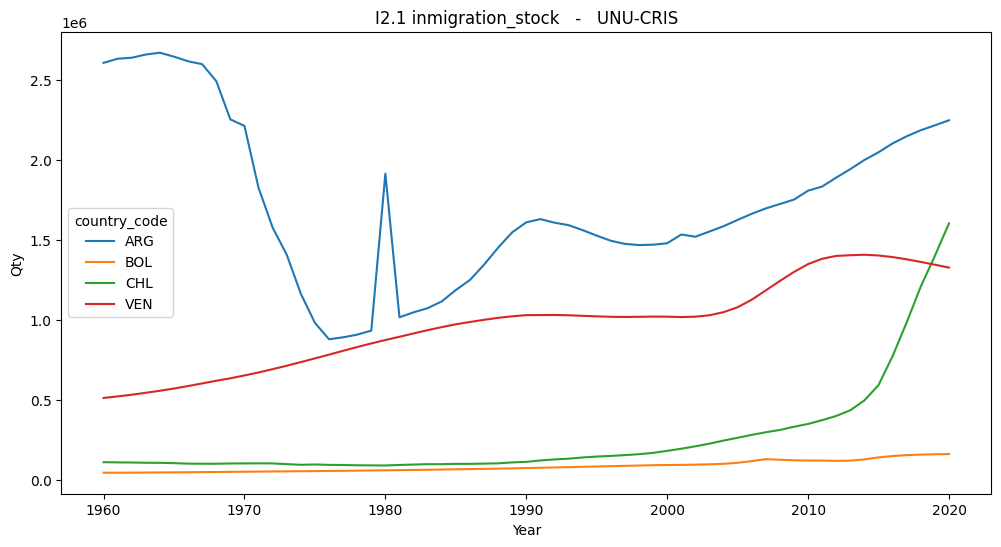

In [ ]:
df_plot=db_indicators[(db_indicators['indicator']=='inmigration_stock')]
title_plot="I2.1 inmigration_stock   -   UNU-CRIS"
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_code', data=df_plot)
plt.title(f'{title_plot}')
plt.xlabel('Year')
plt.ylabel('Qty')
plt.show()

Al corregir los datos de ARgentina con la información censal, la curva de stock de migración cambia.

Voy a probar con los datos de Naciones Unidas


2.2 Emigration Stocks

In [ ]:
countries = ['ARG', 'CHL']
latam_mig_df = df2[(df2['iso_or'].isin(countries))]
print(latam_mig_df.head())



       iso_or     origin iso_des          destination  year  stock  flow  \
110310    ARG  Argentina     AAB  Antigua and Barbuda  1960      3   NaN   
110311    ARG  Argentina     AAB  Antigua and Barbuda  1961      3   0.0   
110312    ARG  Argentina     AAB  Antigua and Barbuda  1962      3   0.0   
110313    ARG  Argentina     AAB  Antigua and Barbuda  1963      3   0.0   
110314    ARG  Argentina     AAB  Antigua and Barbuda  1964      3   0.0   

        inflow  outflow  
110310     NaN      NaN  
110311     NaN      NaN  
110312     NaN      NaN  
110313     NaN      NaN  
110314     NaN      NaN  


In [ ]:
emigration_df = latam_mig_df.groupby(['year', 'iso_or'])['stock'].sum().reset_index()
emigration_df

,year,iso_or,stock
0,1960,ARG,154466
1,1960,CHL,171641
2,1961,ARG,160017
3,1961,CHL,174824
4,1962,ARG,155155
...,...,...,...
117,2018,CHL,638045
118,2019,ARG,1045452
119,2019,CHL,638272
120,2020,ARG,1077397


In [ ]:

db_temp = emigration_df[['iso_or', 'year','stock']]
db_temp = db_temp.rename(columns={
    'iso_or': 'country_code',
    'year': 'year',
    'stock': 'value'
})
print(db_temp.head())

  country_code  year   value
0          ARG  1960  154466
1          CHL  1960  171641
2          ARG  1961  160017
3          CHL  1961  174824
4          ARG  1962  155155


In [ ]:
db_temp['indicator'] = 'emigration_stock'
db_temp['fuente'] = 'UNU-CRIS'

In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

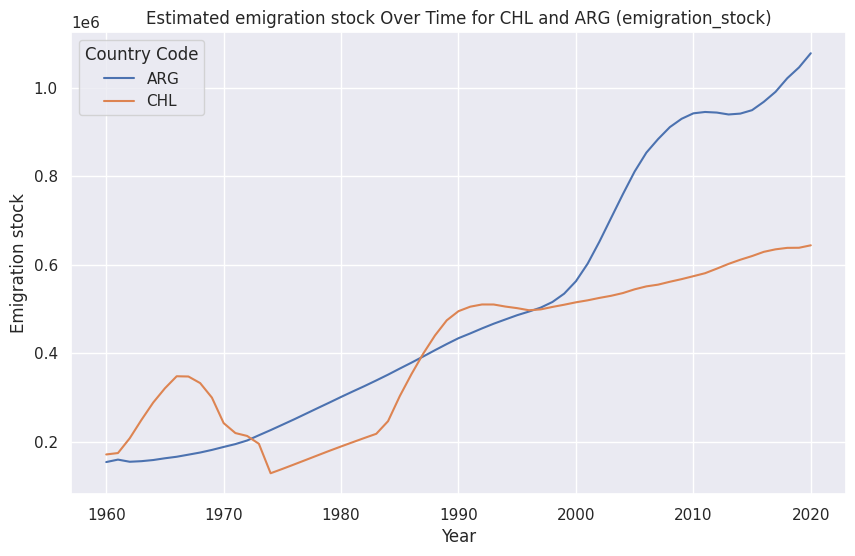

In [ ]:
import seaborn as sns

# Filter for indicator = 'db_temp['indicator'] = 'emigration_stock'

filtered_df = db_indicators[db_indicators['indicator'] == 'emigration_stock']

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = filtered_df[filtered_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Emigration stock')
plt.title('Estimated emigration stock Over Time for CHL and ARG (emigration_stock)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

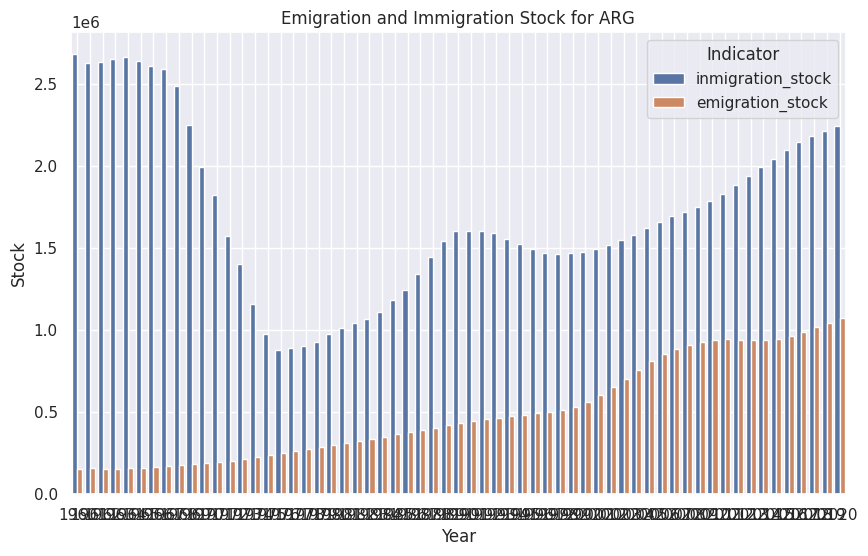

In [ ]:
# Filter for indicators 'emigration_stock' and 'inmigration_stock'
indicators = ['emigration_stock', 'inmigration_stock']
filtered_df = db_indicators[db_indicators['indicator'].isin(indicators)]

# Filter for country ARG
country_df = filtered_df[filtered_df['country_code'] == 'ARG']

# Create the barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.barplot(x='year', y='value', hue='indicator', data=country_df)

plt.xlabel('Year')
plt.ylabel('Stock')
plt.title('Emigration and Immigration Stock for ARG')
plt.legend(title='Indicator')
plt.grid(True)
plt.show()

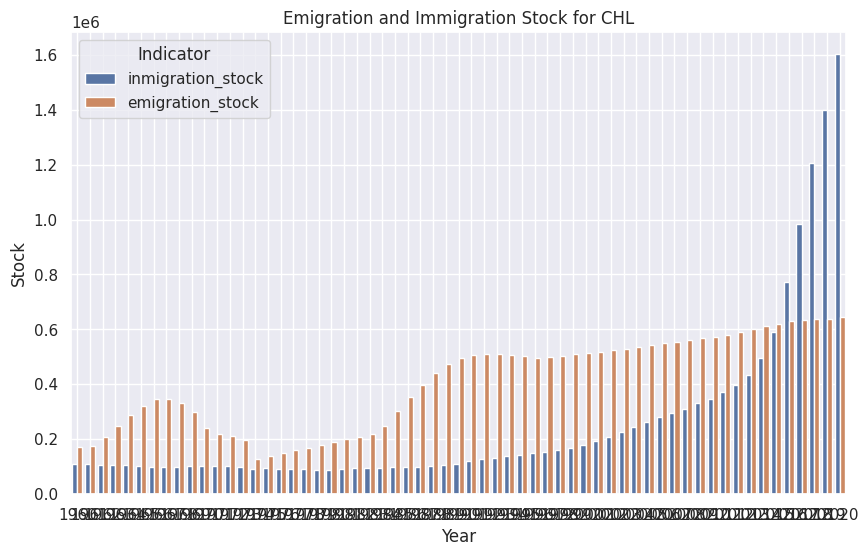

In [ ]:
# prompt: create a barplot for emigration_stock and inmigration stock for ARG (code_country) by year using seaborn

# Assuming db_indicators DataFrame is already created as in the provided code.

# Filter for indicators 'emigration_stock' and 'inmigration_stock'
indicators = ['emigration_stock', 'inmigration_stock']
filtered_df = db_indicators[db_indicators['indicator'].isin(indicators)]

# Filter for country ARG
country_df = filtered_df[filtered_df['country_code'] == 'CHL']

# Create the barplot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.barplot(x='year', y='value', hue='indicator', data=country_df)

plt.xlabel('Year')
plt.ylabel('Stock')
plt.title('Emigration and Immigration Stock for CHL')
plt.legend(title='Indicator')
plt.grid(True)
plt.show()

**I3.1	Total population**

(total_pópulation_wb)

World Bank API
https://databank.worldbank.org/


API information
https://pypi.org/project/wbgapi/


In [ ]:
pip install wbgapi

In [ ]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pop_tot=wb.data.DataFrame('SP.POP.TOTL', ['ARG', 'CHL'], range(1960, 2022), labels=True)
pop_tot = pop_tot.reset_index()
pop_tot

,economy,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,8141820.0,8313535.0,8486120.0,8656006.0,8825046.0,8994936.0,9161649.0,9326268.0,...,17341771.0,17509925.0,17687108.0,17870124.0,18083879.0,18368577.0,18701450.0,19039485.0,19300315.0,19493184.0
1,ARG,Argentina,20349744.0,20680653.0,21020359.0,21364017.0,21708487.0,22053661.0,22403116.0,22757014.0,...,41733271.0,42202935.0,42669500.0,43131966.0,43590368.0,44044811.0,44494502.0,44938712.0,45376763.0,45808747.0


In [ ]:
# Realizar la transformación pivot usando melt

pop_latam = pop_tot.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in pop_tot.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='pop_total')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
pop_latam['year'] = pop_latam['year'].str.replace('YR', '')

# Mostrar las primeras filas de la tabla transformada
print(pop_latam.head())

  economy    Country  year   pop_total
0     CHL      Chile  1960   8141820.0
1     ARG  Argentina  1960  20349744.0
2     CHL      Chile  1961   8313535.0
3     ARG  Argentina  1961  20680653.0
4     CHL      Chile  1962   8486120.0


In [ ]:
#creo el indicador y lo agrego a la base
db_temp = pop_latam[['economy', 'year','pop_total']]
db_temp = db_temp.rename(columns={
    'economy': 'country_code',
    'year': 'year',
    'pop_total': 'value'
})
db_temp['indicator'] = 'total_population_wb'
db_temp['fuente'] = 'World Bank API'
print(db_temp.head())

  country_code  year       value            indicator          fuente
0          CHL  1960   8141820.0  total_population_wb  World Bank API
1          ARG  1960  20349744.0  total_population_wb  World Bank API
2          CHL  1961   8313535.0  total_population_wb  World Bank API
3          ARG  1961  20680653.0  total_population_wb  World Bank API
4          CHL  1962   8486120.0  total_population_wb  World Bank API


In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

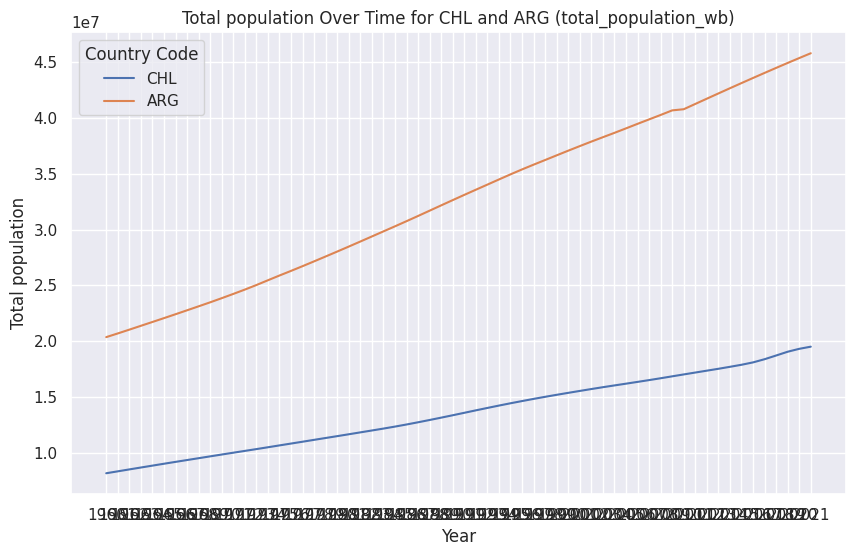

In [ ]:

# Filter for indicator = 'db_temp['indicator'] = 'emigration_stock'

filtered_df = db_indicators[db_indicators['indicator'] == 'total_population_wb']

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = filtered_df[filtered_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Total population')
plt.title('Total population Over Time for CHL and ARG (total_population_wb)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

**I3.2	International migrant stock (% of population)**

migration_pct_wb

In [ ]:
mig_pct=wb.data.DataFrame('SM.POP.TOTL.ZS', ['ARG', 'CHL'], range(1960, 2022), labels=True)
mig_pct = mig_pct.reset_index()
mig_pct

,economy,Country,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.615513,NaN,NaN,NaN,NaN,NaN,NaN
1,ARG,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.805292,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Realizar la transformación pivot usando melt

mig_pct = mig_pct.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in mig_pct.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='mig_pct')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
mig_pct['year'] = mig_pct['year'].str.replace('YR', '')

# Drop rows where 'mig_pct' is NaN
mig_pct = mig_pct.dropna(subset=['mig_pct'])

# Mostrar las primeras filas de la tabla transformada
print(mig_pct.head())

  economy    Country  year  mig_pct
0     CHL      Chile  1960      NaN
1     ARG  Argentina  1960      NaN
2     CHL      Chile  1961      NaN
3     ARG  Argentina  1961      NaN
4     CHL      Chile  1962      NaN


In [ ]:
mig_pct

,economy,Country,year,mig_pct
60,CHL,Chile,1990,0.818045
61,ARG,Argentina,1990,5.041039
70,CHL,Chile,1995,1.003362
71,ARG,Argentina,1995,4.558015
80,CHL,Chile,2000,1.168935
81,ARG,Argentina,2000,4.156300
90,CHL,Chile,2005,1.698399
91,ARG,Argentina,2005,4.274025
100,CHL,Chile,2010,2.171231
101,ARG,Argentina,2010,4.380958


In [ ]:
#creo el indicador y lo agrego a la base
db_temp = mig_pct[['economy', 'year','mig_pct']]
db_temp = db_temp.rename(columns={
    'economy': 'country_code',
    'year': 'year',
    'mig_pct': 'value'
})
db_temp['indicator'] = 'migration_pct_wb'
db_temp['fuente'] = 'World Bank API'
print(db_temp.head())

   country_code  year     value         indicator          fuente
60          CHL  1990  0.818045  migration_pct_wb  World Bank API
61          ARG  1990  5.041039  migration_pct_wb  World Bank API
70          CHL  1995  1.003362  migration_pct_wb  World Bank API
71          ARG  1995  4.558015  migration_pct_wb  World Bank API
80          CHL  2000  1.168935  migration_pct_wb  World Bank API


In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

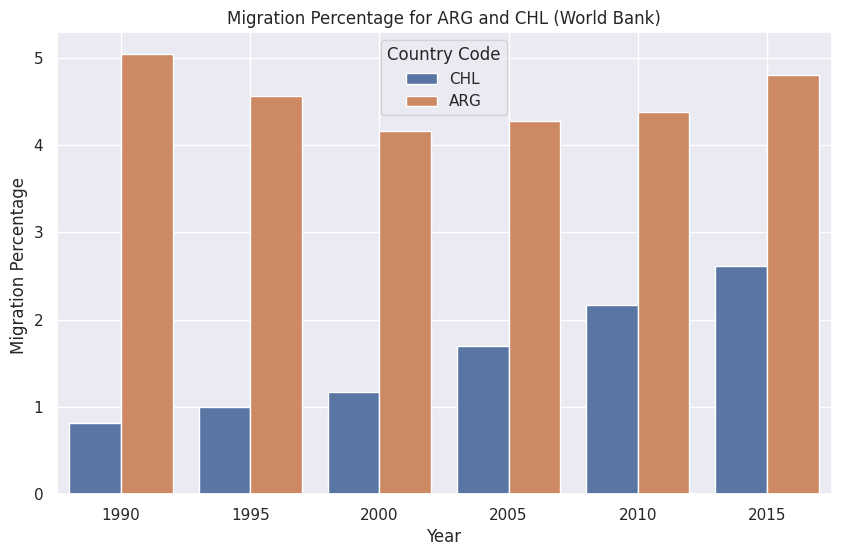

In [ ]:
# prompt: filter db_indicators by indicator==migration_pct_wb  and create a barplot with seaborn for ARG and CHL by year

# Filter db_indicators for indicator == 'migration_pct_wb'
migration_pct_df = db_indicators[db_indicators['indicator'] == 'migration_pct_wb']

# Filter for countries ARG and CHL
countries = ['ARG', 'CHL']
country_df = migration_pct_df[migration_pct_df['country_code'].isin(countries)]

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.barplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Migration Percentage ')
plt.title('Migration Percentage for ARG and CHL (World Bank)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

In [ ]:
# Filter for the specified indicators
indicators_to_keep = ['inmigration_stock', 'total_population_wb']
df_filtered = db_indicators[db_indicators['indicator'].isin(indicators_to_keep)]

# Display the filtered DataFrame
print(df_filtered.head())

  country_code  year      value          indicator    fuente
0          ARG  1960  2683416.0  inmigration_stock  UNU-CRIS
1          CHL  1960   109563.0  inmigration_stock  UNU-CRIS
2          ARG  1961  2630230.0  inmigration_stock  UNU-CRIS
3          CHL  1961   108385.0  inmigration_stock  UNU-CRIS
4          ARG  1962  2636364.0  inmigration_stock  UNU-CRIS


In [ ]:
# prompt: convert year coulmn of df_filtered as an integer

# Convert 'year' column to integer
df_filtered['year'] = df_filtered['year'].astype(int)

<ipython-input-73-5a265b886999>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['year'].astype(int)


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 123
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  246 non-null    object 
 1   year          246 non-null    int64  
 2   value         246 non-null    float64
 3   indicator     246 non-null    object 
 4   fuente        246 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 11.5+ KB


In [ ]:
pivot_df = df_filtered.pivot_table(index=['year','country_code'], columns='indicator', values='value').reset_index()
pivot_df

indicator,year,country_code,inmigration_stock,total_population_wb
0,1960,ARG,2683416.0,20349744.0
1,1960,CHL,109563.0,8141820.0
2,1961,ARG,2630230.0,20680653.0
3,1961,CHL,108385.0,8313535.0
4,1962,ARG,2636364.0,21020359.0
...,...,...,...,...
119,2019,CHL,1399076.0,19039485.0
120,2020,ARG,2245714.0,45376763.0
121,2020,CHL,1601702.0,19300315.0
122,2021,ARG,NaN,45808747.0


In [ ]:
# Calculate the proportion
pivot_df['pct_of_pop'] = pivot_df['inmigration_stock']/pivot_df['total_population_wb']

pivot_df


indicator,year,country_code,inmigration_stock,total_population_wb,pct_of_pop
0,1960,ARG,2683416.0,20349744.0,0.131865
1,1960,CHL,109563.0,8141820.0,0.013457
2,1961,ARG,2630230.0,20680653.0,0.127183
3,1961,CHL,108385.0,8313535.0,0.013037
4,1962,ARG,2636364.0,21020359.0,0.125420
...,...,...,...,...,...
119,2019,CHL,1399076.0,19039485.0,0.073483
120,2020,ARG,2245714.0,45376763.0,0.049490
121,2020,CHL,1601702.0,19300315.0,0.082988
122,2021,ARG,NaN,45808747.0,NaN


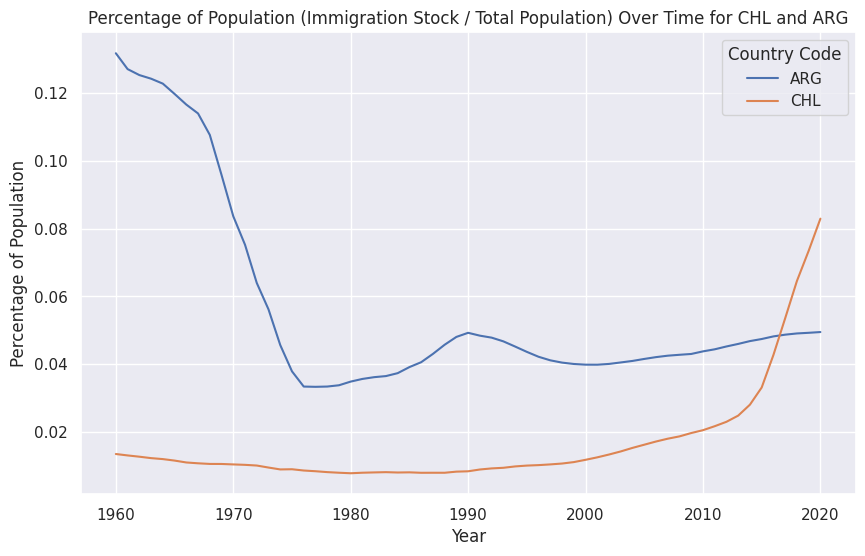

In [ ]:
# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = pivot_df[pivot_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='pct_of_pop', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.title('Percentage of Population (Immigration Stock / Total Population) Over Time for CHL and ARG')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

In [ ]:
#creo el indicador y lo agrego a la base
db_temp =  pivot_df[['year', 'country_code', 'pct_of_pop']]
db_temp = db_temp.rename(columns={
    'country_cod': 'country_code',
    'year': 'year',
    'pct_of_pop': 'value'
})
db_temp['indicator'] = 'migration_pct_calc'
db_temp['fuente'] = 'Calculated by I3-1 & I2.1'
print(db_temp.head())

indicator  year country_code     value           indicator  \
0          1960          ARG  0.131865  migration_pct_calc   
1          1960          CHL  0.013457  migration_pct_calc   
2          1961          ARG  0.127183  migration_pct_calc   
3          1961          CHL  0.013037  migration_pct_calc   
4          1962          ARG  0.125420  migration_pct_calc   

indicator                     fuente  
0          Calculated by I3-1 & I2.1  
1          Calculated by I3-1 & I2.1  
2          Calculated by I3-1 & I2.1  
3          Calculated by I3-1 & I2.1  
4          Calculated by I3-1 & I2.1  


In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

In [ ]:
# Exporto base de datos completa

db_indicators.to_csv('db_indicators.csv', index=False)

In [ ]:
##Filtro y pivoteo para exportar para flourish
df_filtered = db_indicators[db_indicators['indicator'].isin(['pct_of_pop'])]
pivot_df = db_indicators.pivot_table(index=['indicator', 'year'], columns='country_code', values='value').reset_index()

pivot_df.to_csv('pct_of_pop.csv', index=False)

**I3.3 GDP (US$)**

(gdp_wb)

In [ ]:
gdp=wb.data.DataFrame('NY.GDP.MKTP.CD', ['ARG', 'CHL'], range(1990, 2022), labels=True)
gdp = gdp.reset_index()
gdp

,economy,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,3.313782e+10,3.784619e+10,4.594961e+10,4.928738e+10,5.699860e+10,7.344483e+10,7.858410e+10,8.574142e+10,...,2.670248e+11,2.773950e+11,2.595610e+11,2.424504e+11,2.493449e+11,2.761543e+11,2.958576e+11,2.782851e+11,2.540422e+11,3.155150e+11
1,ARG,Argentina,1.413527e+11,1.897200e+11,2.287789e+11,2.367417e+11,2.574400e+11,2.580318e+11,2.721498e+11,2.928590e+11,...,5.459824e+11,5.520251e+11,5.263197e+11,5.947493e+11,5.575323e+11,6.436284e+11,5.248199e+11,4.477547e+11,3.857405e+11,4.879026e+11


In [ ]:
# Realizar la transformación pivot usando melt

gdp = gdp.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in gdp.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='gdp')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
gdp['year'] = gdp['year'].str.replace('YR', '')

# Mostrar las primeras filas de la tabla transformada
print(gdp.head())

  economy    Country  year           gdp
0     CHL      Chile  1990  3.313782e+10
1     ARG  Argentina  1990  1.413527e+11
2     CHL      Chile  1991  3.784619e+10
3     ARG  Argentina  1991  1.897200e+11
4     CHL      Chile  1992  4.594961e+10


In [ ]:
#creo el indicador y lo agrego a la base
db_temp = gdp[['economy', 'year','gdp']]
db_temp = db_temp.rename(columns={
    'economy': 'country_code',
    'year': 'year',
    'gdp': 'value'
})
db_temp['indicator'] = 'gdp_wb'
db_temp['fuente'] = 'World Bank API'
print(db_temp.head())

  country_code  year         value indicator          fuente
0          CHL  1990  3.313782e+10    gdp_wb  World Bank API
1          ARG  1990  1.413527e+11    gdp_wb  World Bank API
2          CHL  1991  3.784619e+10    gdp_wb  World Bank API
3          ARG  1991  1.897200e+11    gdp_wb  World Bank API
4          CHL  1992  4.594961e+10    gdp_wb  World Bank API


In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

In [ ]:
# prompt: convert db_indicators year to integer

# Convert 'year' column to integer
db_indicators['year'] = db_indicators['year'].astype(int)

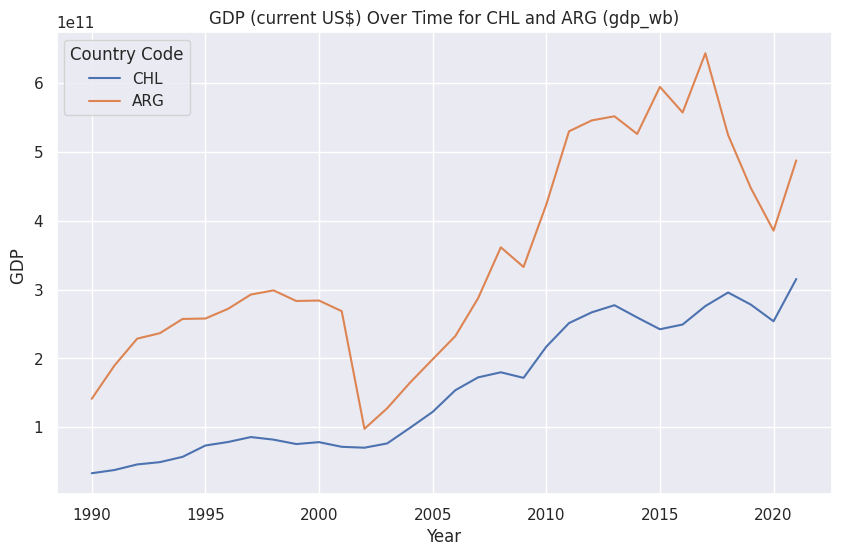

In [ ]:

# Filter for indicator = 'db_temp['indicator'] = 'emigration_stock'

filtered_df = db_indicators[db_indicators['indicator'] == 'gdp_wb']

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = filtered_df[filtered_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('GDP ')
plt.title('GDP (current US$) Over Time for CHL and ARG (gdp_wb)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

**I3.3 Gini index	**
(SI.POV.GINI)

(gini_wb)

In [ ]:
gini=wb.data.DataFrame('SI.POV.GINI', ['ARG', 'CHL'], range(1990, 2022), labels=True)
gini = gini.reset_index()
gini

,economy,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,57.2,NaN,54.8,NaN,56.4,NaN,54.9,NaN,...,NaN,46.8,NaN,45.3,NaN,45.3,NaN,NaN,47.0,NaN
1,ARG,Argentina,NaN,46.8,45.5,44.8,45.9,48.9,49.5,49.1,...,41.4,41.1,41.8,NaN,42.3,41.4,41.7,43.3,42.7,42.4


In [ ]:
# Realizar la transformación pivot usando melt

gini = gini.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in gini.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='gini')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
gini['year'] = gini['year'].str.replace('YR', '')

# Mostrar las primeras filas de la tabla transformada
print(gini.head())

  economy    Country  year  gini
0     CHL      Chile  1990  57.2
1     ARG  Argentina  1990   NaN
2     CHL      Chile  1991   NaN
3     ARG  Argentina  1991  46.8
4     CHL      Chile  1992  54.8


In [ ]:
#creo el indicador y lo agrego a la base
db_temp = gini[['economy', 'year','gini']]
db_temp = db_temp.rename(columns={
    'economy': 'country_code',
    'year': 'year',
    'gini': 'value'
})
db_temp['indicator'] = 'gini_wb'
db_temp['fuente'] = 'World Bank API'

db_temp = db_temp.dropna(subset=['value'])
print(db_temp.head())

  country_code  year  value indicator          fuente
0          CHL  1990   57.2   gini_wb  World Bank API
3          ARG  1991   46.8   gini_wb  World Bank API
4          CHL  1992   54.8   gini_wb  World Bank API
5          ARG  1992   45.5   gini_wb  World Bank API
7          ARG  1993   44.8   gini_wb  World Bank API


In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

In [ ]:
# Convert 'year' column to integer
db_indicators['year'] = db_indicators['year'].astype(int)

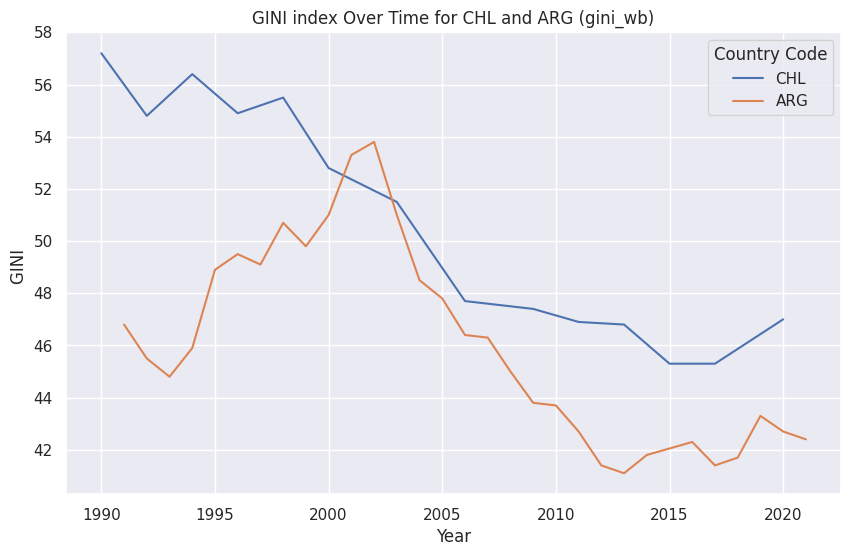

In [ ]:
# Filter for indicator = 'db_temp['indicator'] = 'emigration_stock'

filtered_df = db_indicators[db_indicators['indicator'] == 'gini_wb']

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = filtered_df[filtered_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('GINI ')
plt.title('GINI index Over Time for CHL and ARG (gini_wb)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

**I3.4 Poverty headcount ratio at national poverty lines (% of population) (SI.POV.NAHC)**

poverty_wb

In [ ]:
pov=wb.data.DataFrame('SI.POV.NAHC', ['ARG', 'CHL'], range(1990, 2022), labels=True)
pov = pov.reset_index()
pov

,economy,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.4,NaN,11.7,NaN,8.6,NaN,NaN,10.8,NaN
1,ARG,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.3,25.7,32.0,35.5,42.0,37.3


In [ ]:
# Realizar la transformación pivot usando melt

pov = pov.melt(id_vars=['economy', 'Country'],
                    value_vars=[col for col in pov.columns if col.startswith('YR')],
                    var_name='year',
                    value_name='pov')

# Limpiar la columna 'YEAR' eliminando el prefijo 'YR'
pov['year'] = pov['year'].str.replace('YR', '')

# Mostrar las primeras filas de la tabla transformada
print(pov.head())

  economy    Country  year  pov
0     CHL      Chile  1990  NaN
1     ARG  Argentina  1990  NaN
2     CHL      Chile  1991  NaN
3     ARG  Argentina  1991  NaN
4     CHL      Chile  1992  NaN


In [ ]:
#creo el indicador y lo agrego a la base
db_temp = pov[['economy', 'year','pov']]
db_temp = db_temp.rename(columns={
    'economy': 'country_code',
    'year': 'year',
    'pov': 'value'
})
db_temp['indicator'] = 'poverty_wb'
db_temp['fuente'] = 'World Bank API'

db_temp = db_temp.dropna(subset=['value'])
print(db_temp.head())

   country_code  year  value   indicator          fuente
20          CHL  2000   36.0  poverty_wb  World Bank API
26          CHL  2003   35.4  poverty_wb  World Bank API
32          CHL  2006   29.1  poverty_wb  World Bank API
38          CHL  2009   25.3  poverty_wb  World Bank API
42          CHL  2011   22.2  poverty_wb  World Bank API


In [ ]:
db_indicators = pd.concat([db_indicators, db_temp], axis=0)

In [ ]:
# Convert 'year' column to integer
db_indicators['year'] = db_indicators['year'].astype(int)

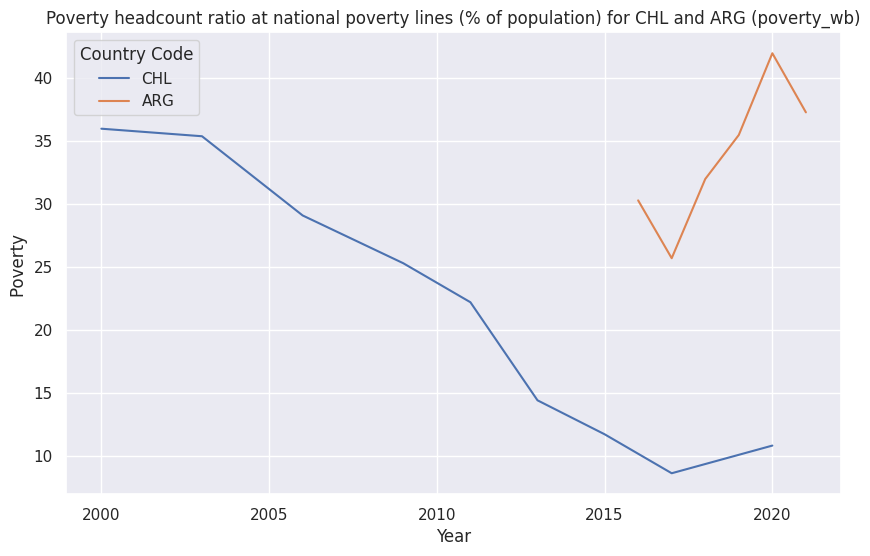

In [ ]:
filtered_df = db_indicators[db_indicators['indicator'] == 'poverty_wb']

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = filtered_df[filtered_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Poverty ')
plt.title('Poverty headcount ratio at national poverty lines (% of population) for CHL and ARG (poverty_wb)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

In [ ]:
# Export the complete database
db_indicators.to_csv('db_indicators.csv', index=False)

**I3.5 Multidimensional poverty headcount ratio (World Bank) (% of population) (SI.POV.MPWB)**

(poverty_multi_wb)

In [ ]:
pov_multi=wb.data.DataFrame('SI.POV.MPWB', ['ARG', 'CHL'], range(1990, 2022), labels=True)
pov_multi = pov_multi.reset_index()
pov_multi

,economy,Country,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,CHL,Chile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.6,NaN,0.5,NaN,0.4,NaN,NaN,1.8,NaN
1,ARG,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.7,0.6,NaN,0.7,0.6,1.1,1.1,1.2,0.9
